Train model and generate trained models performace summary.  
Models are ordered by validation performace from good to bad

In [1]:
import joblib
import matplotlib.pyplot as plt
from vol_predict import VolPredictor
from sklearn.model_selection import train_test_split

ticker = 'GLD'
DAYS_WINDOW_SIZE = 21
RETRIEVE_PERIOD = '5y'
SEQUENCE_LENGTH_WINDOWS = 6
TARGET_STEPS = 1

model_path = f'./vol_lstm.keras'
scaler_path = './scaler.pkl'

predictor = VolPredictor()

market_data = predictor.get_market_data(ticker, retrieve_period=RETRIEVE_PERIOD)
vol_data = predictor.calculate_return_and_vol(market_data, DAYS_WINDOW_SIZE)

col_names = [f'{predictor._VCOL_PREFIX}_{DAYS_WINDOW_SIZE}']
scaled_vol_data = predictor.normalise_data(vol_data, cols=col_names)
features = [col for col in scaled_vol_data.columns if col.startswith(predictor._FEATURE_PREFIX)]
feature_data_array = scaled_vol_data[features].values
X_array, y_array = predictor.restruncture_data(feature_data_array, vol_window_days=DAYS_WINDOW_SIZE, sequence_months=SEQUENCE_LENGTH_WINDOWS, target_steps=TARGET_STEPS)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=0) 
tuner = predictor.train_model(X_train_val, y_train_val, model_path=model_path)

joblib.dump(predictor.scaler, scaler_path)

trial_performance_df = predictor.generate_model_performance(tuner, X_test=X_test, y_test=y_test, X_all=X_array, y_all=y_array)
trial_performance_df

Trial 20 Complete [00h 00m 34s]
multi_objective: 0.022909680381417274

Best multi_objective So Far: 0.018319938331842422
Total elapsed time: 00h 18m 15s
35/35 [==============================] - 0s 10ms/step - loss: 0.0262 - smape: 41.2166


,trial_id,score,test_loss,test_metric,all_loss,all_metric,number of hidden layers,units_1,dropout_1,lr,units_2,dropout_2,loss_last,smape_last,val_loss_last,val_smape_last,multi_objective_last,units_3,dropout_3
0,0,0.023921,0.0208,38.3880,0.0182,36.4241,2,128,0.2,0.000175,32,0.1,0.026090,40.367310,0.023921,38.795990,0.023921,NaN,NaN
1,1,0.022047,0.0240,41.5949,0.0210,38.9577,1,96,0.2,0.001065,64,0.2,0.023444,39.690781,0.022047,39.456829,0.022047,NaN,NaN
2,2,0.023692,0.0230,41.2273,0.0215,39.0991,1,96,0.1,0.000148,96,0.2,0.025381,39.787674,0.023692,38.881653,0.023692,NaN,NaN
3,3,0.024124,0.0235,41.2137,0.0220,39.4300,3,32,0.2,0.002959,32,0.1,0.027343,41.404823,0.024124,38.453041,0.024124,32.0,0.1
4,4,0.024298,0.0230,41.2313,0.0220,39.4138,3,64,0.1,0.000215,128,0.2,0.026257,40.162312,0.024298,38.950340,0.024298,96.0,0.2
5,5,0.023299,0.0230,41.6701,0.0213,39.3016,1,32,0.2,0.000517,64,0.2,0.025951,40.624359,0.023299,38.902504,0.023299,96.0,0.2
6,6,0.021855,0.0233,41.6232,0.0223,39.8535,1,64,0.2,0.001749,96,0.1,0.022889,39.365925,0.021855,39.236595,0.021855,128.0,0.1
7,7,0.020272,0.0235,41.8256,0.0225,39.9151,3,96,0.1,0.004679,64,0.2,0.021124,38.178093,0.020272,38.911957,0.020272,128.0,0.1
8,8,0.023710,0.0234,41.6840,0.0227,39.9006,2,64,0.1,0.000921,32,0.2,0.026255,40.345139,0.023710,38.506813,0.023710,96.0,0.2
9,9,0.021168,0.0236,41.7329,0.0228,39.9676,3,64,0.2,0.006253,128,0.1,0.023197,39.627831,0.021168,38.450783,0.021168,128.0,0.1


Plot models performance

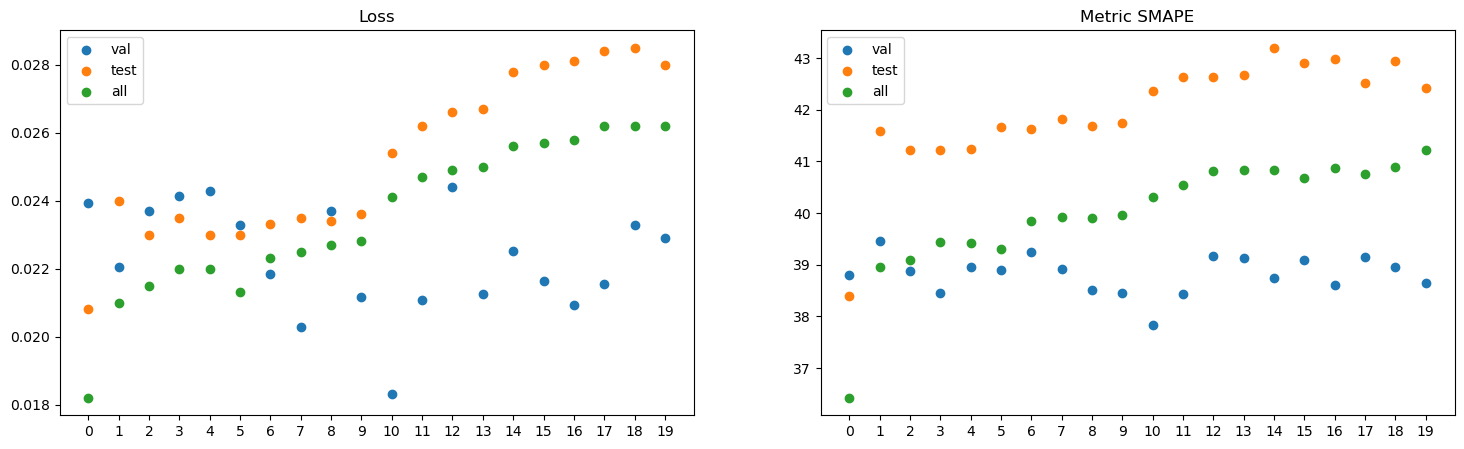

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].scatter(y=trial_performance_df['score'], x=trial_performance_df.index, label='val')
axs[0].scatter(y=trial_performance_df['test_loss'], x=trial_performance_df.index, label='test')
axs[0].scatter(y=trial_performance_df['all_loss'], x=trial_performance_df.index, label='all')
axs[0].set_title('Loss')
axs[0].set_xticks(trial_performance_df.index)
axs[0].legend()

axs[1].scatter(y=trial_performance_df['val_smape_last'], x=trial_performance_df.index, label='val')
axs[1].scatter(y=trial_performance_df['test_metric'], x=trial_performance_df.index, label='test')
axs[1].scatter(y=trial_performance_df['all_metric'], x=trial_performance_df.index, label='all')
axs[1].set_title('Metric SMAPE')
axs[1].set_xticks(trial_performance_df.index)
axs[1].legend()

plt.show()

Predict on lastest data

In [3]:
from vol_predict import VolPredictor

DAYS_WINDOW_SIZE = 21
SEQUENCE_LENGTH_WINDOWS = 6
ticker = 'GLD'
saved_scaler = joblib.load(scaler_path)

vol_predictor = VolPredictor()
num_samples = DAYS_WINDOW_SIZE * (SEQUENCE_LENGTH_WINDOWS-1) + 1
pred_market_data = vol_predictor.get_market_data(ticker=ticker, retrieve_period=f'{SEQUENCE_LENGTH_WINDOWS + 2}mo')
pred_return_vol = vol_predictor.calculate_return_and_vol(data_df=pred_market_data, window_size=DAYS_WINDOW_SIZE)
col_names = [f'{vol_predictor._VCOL_PREFIX}_{DAYS_WINDOW_SIZE}']
pred_scaled_vol_data = vol_predictor.normalise_data(pred_return_vol, cols=col_names, scaler=saved_scaler)
features = [col for col in pred_scaled_vol_data.columns if col.startswith(vol_predictor._FEATURE_PREFIX)]
pred_feature_data_array = pred_scaled_vol_data[features].values
X_pred = vol_predictor.restruncture_data(pred_feature_data_array, vol_window_days=DAYS_WINDOW_SIZE, sequence_months=SEQUENCE_LENGTH_WINDOWS)[-1]

# model = tuner.get_best_models(1)[0]
model = vol_predictor.load_model(model_path)
rv_pred = model.predict(X_pred.reshape(1,SEQUENCE_LENGTH_WINDOWS,1))
rv_inver_pred = vol_predictor.scaler.inverse_transform(rv_pred)

print(X_pred)
print(rv_pred)
print(rv_inver_pred)

d:\note_repo\QF\vol_predict.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[names] = self.scaler.transform(data_df[cols].values)


1/1 [==============================] - 2s 2s/step
[[0.28775101]
 [0.218118  ]
 [0.31763887]
 [0.21544579]
 [0.99510498]
 [0.77641438]]
[[0.35922945]]
[[0.15689753]]


Get corresponding Implied Vol

In [4]:
from pandas.tseries.offsets import BDay
import iv_helper 

from importlib import reload

reload(iv_helper)

ticker = 'GLD'
# The end point for the sequent data used to predict next time step realised vol
current_date = pred_market_data.iloc[-1]['Date']
target_date = (current_date + BDay(DAYS_WINDOW_SIZE)).date()

asset = iv_helper.get_asset(ticker)
market_price = iv_helper.get_asset_price_for_given_date(asset, current_date)
iv = iv_helper.get_implied_vol(asset, market_price, target_date)

In [5]:
print(f'Implied Vol: {iv:.4f}, Realised Vol: {rv_inver_pred[0][0]:.4f}')

Implied Vol: 0.1906, Realised Vol: 0.1569


Strategy 

if iv - rv > threshold:
    sell straddle -- to earn premium
                     expecting market overestimate volatililty
                     the asset price stays small movement and both options expire worthless
                     if asset price move a lot, the losses can be large. price increase can be unlimited

if iv - rv < -threshold:
    buy straddle --  to earn one leg of the straddle profit
                     expecting market is underestimating volatility 
                     the asset price will move a lot and one leg of straddle profit
                     if asset price stays flat, the lossees will be premiums of both options
                            